In [3]:
import numpy as np
import matplotlib.pyplot as plt

coefficients = [
    (10.2, -3.2, 149),
    (-5.8, 16, 83),
    (10.3, 7.3, 234)
]



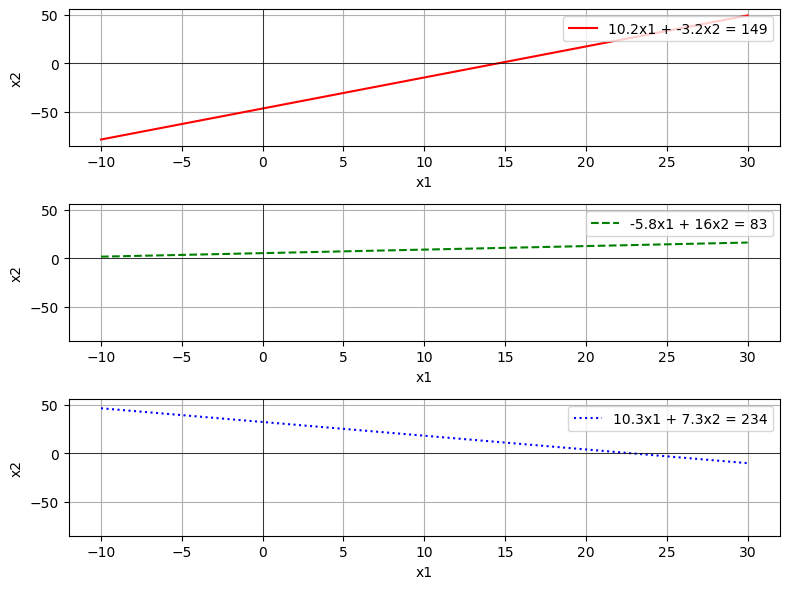

In [6]:
def plot_line(ax, a, b, c, color, linestyle, label):
    x = np.linspace(-10, 30, 400)
    y = (c - a * x) / b
    ax.plot(x, y, label=label, color=color, linestyle=linestyle)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.grid(True)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)

def plot_all_lines(coefficients):
    fig, axes = plt.subplots(len(coefficients), 1, figsize=(8, 6), sharey=True)
    colors = ['red', 'green', 'blue']  # Різні кольори для кожної прямої
    linestyles = ['-', '--', ':']  # Різні типи ліній для кожної прямої
    for i, (a, b, c) in enumerate(coefficients):
        plot_line(axes[i], a, b, c, colors[i], linestyles[i], f"{a}x1 + {b}x2 = {c}")
        axes[i].legend(loc='upper right')

    fig.tight_layout()
    plt.show()

plot_all_lines(coefficients)


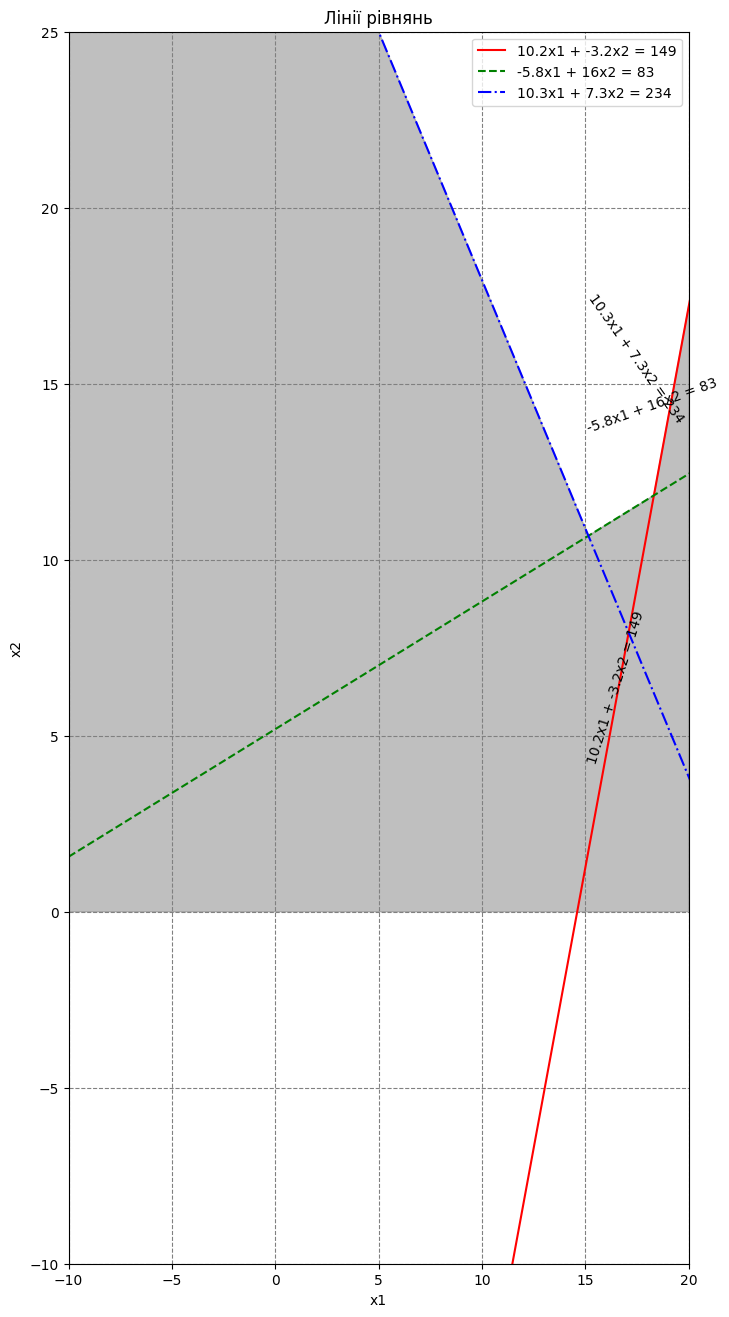

In [7]:
def plot_line(a, b, c, color, linestyle, label):
    x = np.linspace(-10, 30, 400)
    y = (c - a * x) / b
    plt.plot(x, y, label=label, color=color, linestyle=linestyle)
    plt.text(15, (c - 15 * a) / b + 3, f"{a}x1 + {b}x2 = {c}", fontsize=10, rotation=-np.arctan(a / b) * 180 / np.pi)

def plot_all_lines(coefficients):
    plt.figure(figsize=(8, 16), dpi=100)
    colors = ['red', 'green', 'blue']  # Різні кольори для кожної прямої
    linestyles = ['-', '--', '-.']  # Різні типи ліній для кожної прямої
    for i, (a, b, c) in enumerate(coefficients):
        plot_line(a, b, c, colors[i], linestyles[i], f"{a}x1 + {b}x2 = {c}")

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Лінії рівнянь")
    plt.legend()
    plt.grid(True, color='gray', linestyle='--')  # Сітка з коліром та типом лінії
    plt.xlim(-10, 20)  # Масштабування по x
    plt.ylim(-10, 25)  # Масштабування по y

    # Заповнення області, утвореної перетином всіх прямих
    x = np.linspace(-10, 20, 400)
    y1 = (coefficients[0][2] - coefficients[0][0] * x) / coefficients[0][1]
    y2 = (coefficients[1][2] - coefficients[1][0] * x) / coefficients[1][1]
    y3 = (coefficients[2][2] - coefficients[2][0] * x) / coefficients[2][1]
    plt.fill_between(x, np.maximum.reduce([y1, y2, y3]), color='gray', alpha=0.5)

    plt.show()

plot_all_lines(coefficients)

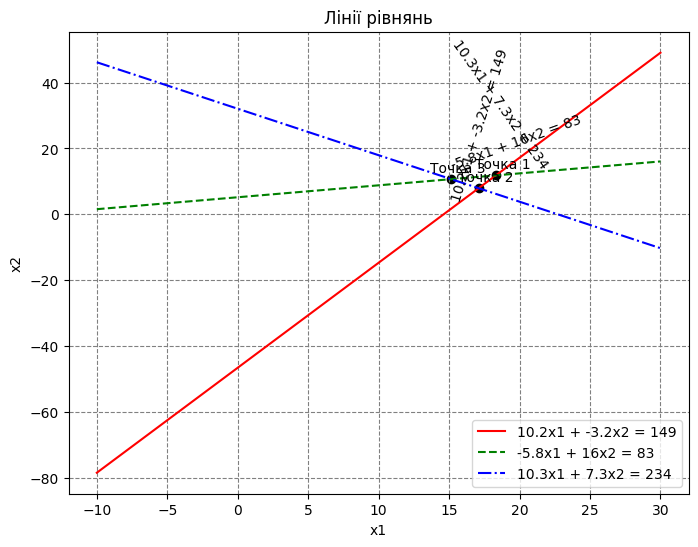

In [8]:
def plot_line(a, b, c, color, linestyle, label):
    x = np.linspace(-10, 30, 400)
    y = (c - a * x) / b
    plt.plot(x, y, label=label, color=color, linestyle=linestyle)
    plt.text(15, (c - 15 * a) / b + 3, f"{a}x1 + {b}x2 = {c}", fontsize=10, rotation=-np.arctan(a / b) * 180 / np.pi)

def find_intersection_point(coefficients):
    intersections = []
    for i in range(len(coefficients)):
        for j in range(i + 1, len(coefficients)):
            A = np.array([[coefficients[i][0], coefficients[i][1]], [coefficients[j][0], coefficients[j][1]]])
            b = np.array([coefficients[i][2], coefficients[j][2]])
            intersection = np.linalg.solve(A, b)
            intersections.append(intersection)
    return intersections

def plot_all_lines(coefficients):
    plt.figure(figsize=(8, 6))
    colors = ['red', 'green', 'blue']  # Різні кольори для кожної прямої
    linestyles = ['-', '--', '-.']  # Різні типи ліній для кожної прямої
    for i, (a, b, c) in enumerate(coefficients):
        plot_line(a, b, c, colors[i], linestyles[i], f"{a}x1 + {b}x2 = {c}")

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Лінії рівнянь")
    plt.legend()
    plt.grid(True, color='gray', linestyle='--')  # Сітка з коліром та типом лінії

    # Знаходження та побудова точок перетину
    intersections = find_intersection_point(coefficients)
    for i, point in enumerate(intersections):
        plt.scatter(point[0], point[1], color='black', marker='o', label=f'Точка перетину {i+1}')
        plt.annotate(f'Точка {i+1}', (point[0], point[1]), textcoords="offset points", xytext=(5,5), ha='center')

    plt.show()

plot_all_lines(coefficients)